## Popularity Based recomendation SystemLos sistemas de recomendación, a veces llamados en inglés “recommender systems” son algoritmos que intentan “predecir” los siguientes ítems (productos, canciones, etc.) que querrá adquirir un usuario  part  r.

Popularity: Aconseja por la “popularidad” de los productos. Por ejemplo, “los más vendidos” globalmente, se ofrecerán a todos los usuarios por igual sin aprovechar la personalización. Es fácil de implementar y en algunos casos es efect  iva.

**Libraries**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#avoid Warnings
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
data = pd.read_csv('data.csv')
data.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


In [3]:
data.shape

(3678, 12)

## EDA

#### Check duplicated values

In [5]:
data.duplicated().any()

True

In [10]:
print('cantidad de datos duplicados a eliminar = ', len(data[data.duplicated()]))

cantidad de datos duplicados a eliminar =  6


#### Drop duplicates

In [11]:
data = data.drop_duplicates()
data.shape

(3672, 12)

#### num_subscribers top 10 courses

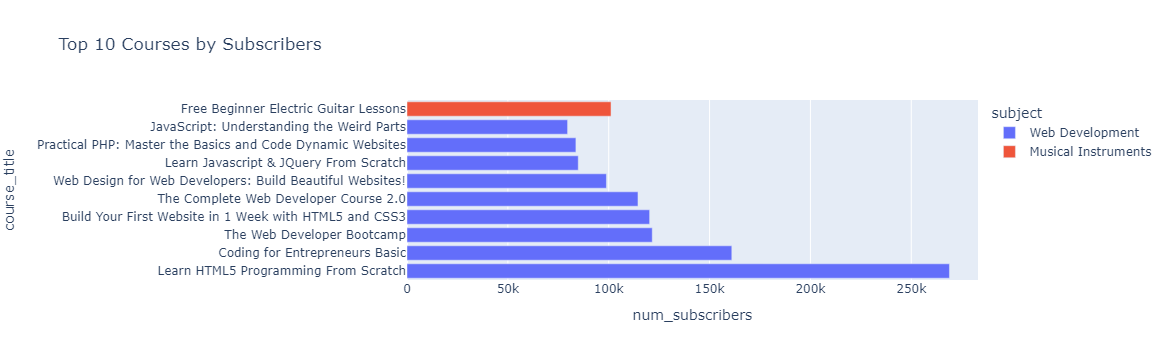

In [23]:
num_sub =data[['course_title','subject','num_subscribers']].sort_values(by ='num_subscribers', ascending = False).head(10)

fig = px.bar(num_sub, 
             y="course_title",  
             x="num_subscribers",  
             title="Top 10 Courses by Subscribers",  color = 'subject',
             )

fig.show()

#### top 10 courses by num_reviews

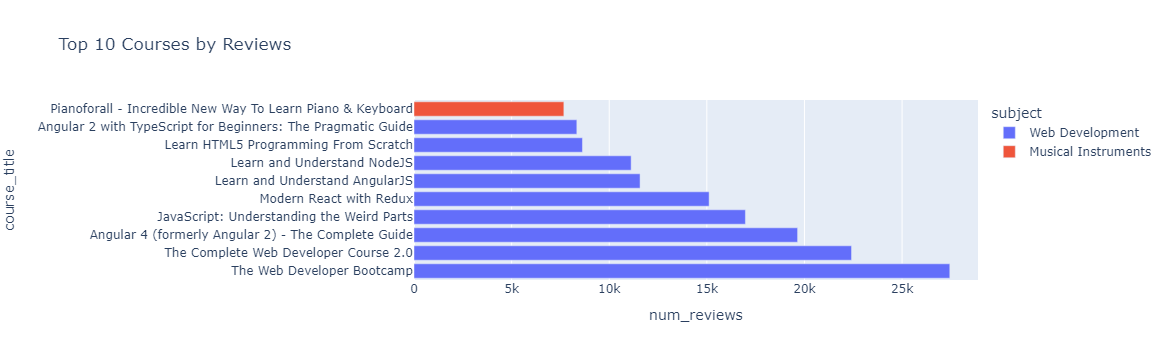

In [24]:
num_rew =data[['course_title','subject','num_reviews']].sort_values(by ='num_reviews', ascending = False).head(10)

fig = px.bar(num_rew, 
             y="course_title",  
             x="num_reviews",  
             title="Top 10 Courses by Reviews",  color = 'subject',
             )

fig.show()

## Recomendation System Popularity

In [28]:
def popularity_based_recommendation(df, top_n=5):
   # Calcular el score de popularidad de cada curso
  df['popularity_score'] = 0.6 * df['num_subscribers'] + 0.4 * df['num_reviews']

  # ordenar por score de poupularidad
  df_sorted = df.sort_values(by='popularity_score', ascending=False)

  # Seleccionar las columnas titulo y score de popularidad
  recommended_courses = df_sorted[['course_title', 'popularity_score', 'subject']].head(top_n)

  return recommended_courses

In [30]:
popularity = popularity_based_recommendation(data, top_n=10)
popularity

,course_title,popularity_score,subject
2827,Learn HTML5 Programming From Scratch,164805.4,Web Development
3032,Coding for Entrepreneurs Basic,96729.0,Web Development
3230,The Web Developer Bootcamp,83928.4,Web Development
3232,The Complete Web Developer Course 2.0,77672.0,Web Development
2783,Build Your First Website in 1 Week with HTML5 ...,74544.2,Web Development
2589,Web Design for Web Developers: Build Beautiful...,61925.0,Web Development
1896,Free Beginner Electric Guitar Lessons,61109.2,Musical Instruments
3247,JavaScript: Understanding the Weird Parts,54557.6,Web Development
3204,Angular 4 (formerly Angular 2) - The Complete ...,52129.4,Web Development
3289,Practical PHP: Master the Basics and Code Dyna...,52081.4,Web Development


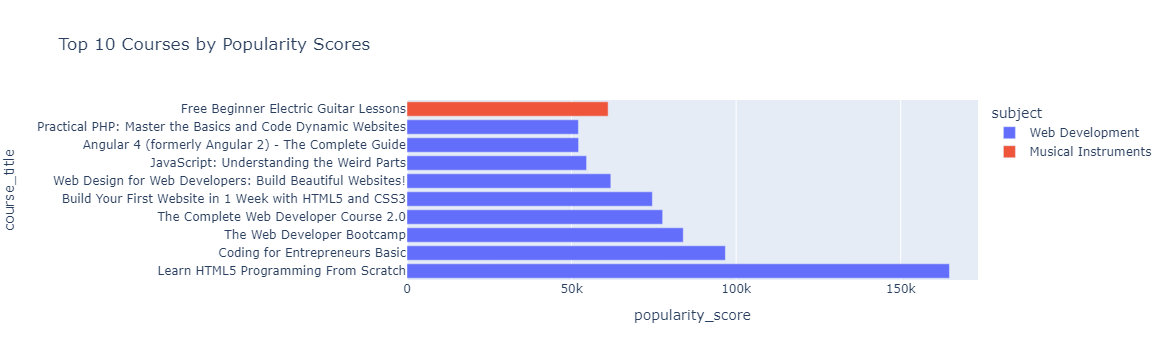

In [32]:
fig = px.bar(popularity, 
             y="course_title",  
             x="popularity_score",  
             title="Top 10 Courses by Popularity Scores",  color = 'subject',
             )

fig.show()

## Recomendation System Using Weigted Avarge for each Rating

![Average](Avg.png)

#### Calulated all components

In [33]:
v = data['num_subscribers']
R = data['num_reviews']
C = data['num_subscribers'].mean()
m = data['num_subscribers'].quantile(0.70)

In [34]:
data['weighted_average'] = ((R*v)+ (C*m))/(v+m)

In [40]:
w = data[['course_title','subject' ,'weighted_average']].sort_values(by = 'weighted_average', ascending=False).head(10)

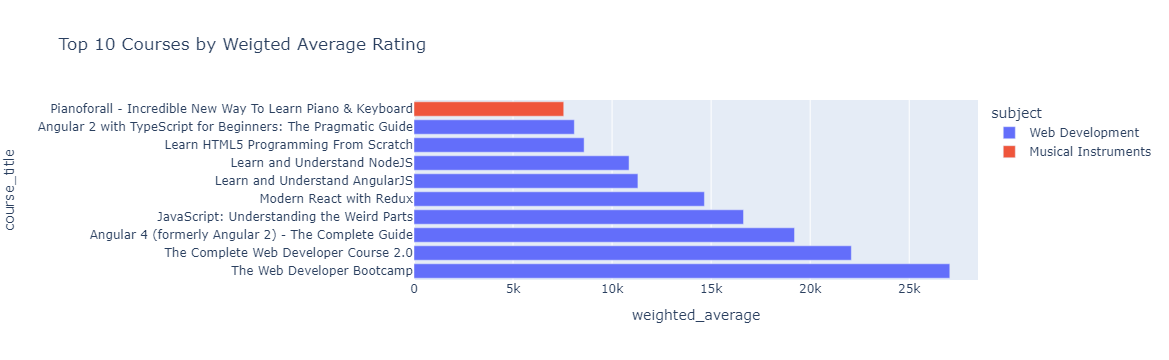

In [42]:
fig = px.bar(w, 
             y="course_title",  
             x="weighted_average",  
             title="Top 10 Courses by Weigted Average Rating",  color = 'subject',
             )

fig.show()

## Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
sc = MinMaxScaler()
data_normilize = sc.fit_transform(data[['popularity_score', 'weighted_average']])
data_normilize = pd.DataFrame(data_normilize, columns = ['popularity_score', 'weighted_average'] )
data_normilize.head()

,popularity_score,weighted_average
0,0.007872,0.048047
1,0.012405,0.059860
2,0.008094,0.048665
3,0.008950,0.043902
4,0.004755,0.063519


In [49]:
#Replaces columns for normilezed data columns
data[['popularity_score', 'weighted_average']] = data_normilize
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,popularity_score,weighted_average
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,0.007872,0.048047
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,0.012405,0.059860
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,0.008094,0.048665
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,0.008950,0.043902
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,0.004755,0.063519


In [50]:
data['score'] = data['popularity_score'] * 0.5 + data['weighted_average'] * 0.5

In [52]:
scores = data[['course_title', 'subject', 'score']].sort_values(by = 'score', ascending=False).head(10)

In [55]:
scores

,course_title,subject,score
3224,Vue JS 2 - The Complete Guide (incl. Vue Route...,Web Development,0.754629
2821,Master Regular Expressions from scratch - All ...,Web Development,0.655291
3226,The Complete JavaScript Course: Build a Real-W...,Web Development,0.642845
3198,Accelerated ES6 JavaScript Training,Web Development,0.511789
3241,One-stop Ruby on Rails: Build Web Applications...,Web Development,0.471063
3248,Webpack 2: The Complete Developer's Guide,Web Development,0.379528
2777,The Complete front end web developer Bootcamp ...,Web Development,0.330852
3240,Learn Spring Framework Practically - Hands On ...,Web Development,0.328105
3245,The Most Comprehensive Web Development Course,Web Development,0.317106
2583,The Complete Web Development Tutorial Using Re...,Web Development,0.303148


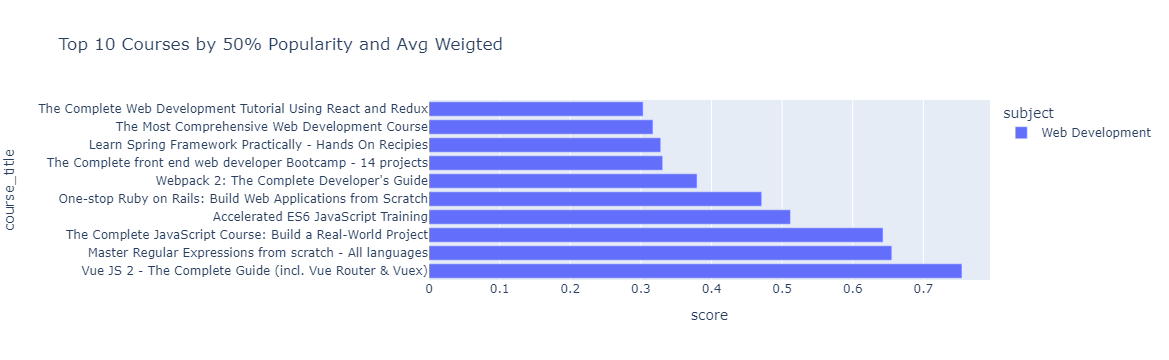

In [54]:
fig = px.bar(scores, 
             y="course_title",  
             x="score",  
             title="Top 10 Courses by 50% Popularity and Avg Weigted",  color = 'subject',
             )

fig.show()